### Visualizaciones de datos para el dataset Police_Arrests_20240702
En este notebook "03_visualizaciones" se ejecutan codigos para agregar  visualizaciones en función de las variables ya existentes al "df_limpio" con las nuevas variales resultante del notebook "02_creacion_de_variables"

In [54]:
# Importo librerias de python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Declaro el dataframe a usar
eccomerce_sales =r'C:\Users\Administrador\OneDrive - udd.cl\Python para la ciencia de datos\proyecto_final\Data\Police_Arrests_20240702.csv'
df = pd.read_csv(eccomerce_sales)

In [4]:
# Replico los pasos claves para llegar a df_limpio
df['Event Date/Time'] = pd.to_datetime(df['Event Date/Time'])
df_sin_nulos = df.dropna()
df_limpio= df_sin_nulos.loc[(df_sin_nulos["Subject's age"] <= 80) & (df_sin_nulos["Subject's age"] >= 18)]
# Agrego columnas para año, mes, semana y día de la semana
df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
df_limpio['Week'] = df_limpio['Event Date/Time'].dt.isocalendar().week
df_limpio['Weekday'] = df_limpio['Event Date/Time'].dt.day_name()
bins = [18, 30, 50, float('inf')]
labels = ['Adulto joven', 'Adulto maduro', 'Adulto mayor']
df_limpio['AgeGroup'] = pd.cut(df_limpio["Subject's age"], bins=bins, labels=labels, right=False)

# Verifico df limpio
info = df_limpio.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
Index: 16317 entries, 0 to 23509
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Reference Number     16317 non-null  int64         
 1   Subject's race          16317 non-null  object        
 2   Subject's gender        16317 non-null  object        
 3   Subject's age           16317 non-null  int64         
 4   Ethnicity               16317 non-null  object        
 5   District of occurrence  16317 non-null  float64       
 6   Adjacent to School      16317 non-null  int64         
 7   Assigned Division       16317 non-null  object        
 8   Assigned Bureau         16317 non-null  object        
 9   Event Date/Time         16317 non-null  datetime64[ns]
 10  Year                    16317 non-null  int32         
 11  Month                   16317 non-null  int32         
 12  Week                    16317 non-null  UInt32     

C:\Users\Administrador\AppData\Local\Temp\ipykernel_3824\3399589432.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Year'] = df_limpio['Event Date/Time'].dt.year
C:\Users\Administrador\AppData\Local\Temp\ipykernel_3824\3399589432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Month'] = df_limpio['Event Date/Time'].dt.month
C:\Users\Administrador\AppData\Local\Temp\ipykernel_3824\3399589432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

### Si nos consideramos miembros de la policia y buscamos tomar decisiones basada en datos  
nos interesa concluir respecto:  
`- ¿Cúal ha sido la evolución de casos en el tiempo?`  
`- ¿Cuando ocurrieron más casos?`  
`- ¿Cúal es la división que ha registrado más casos?`

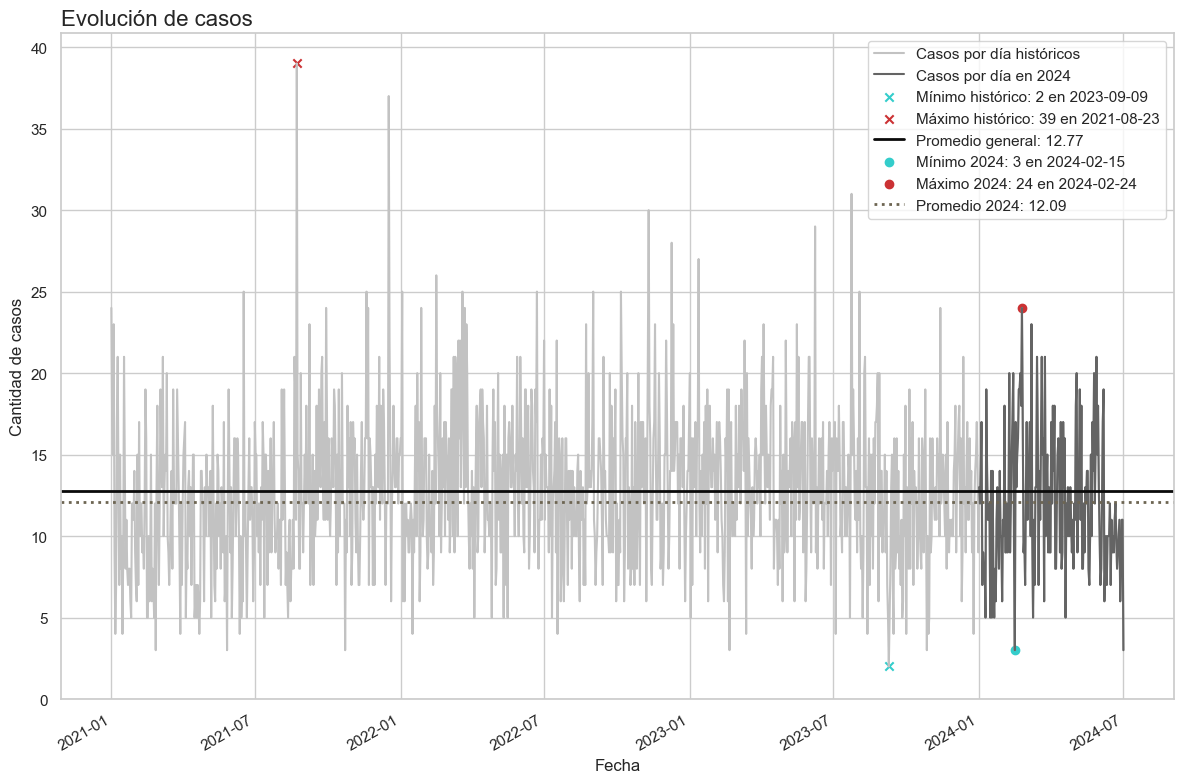

In [228]:
# ¿Cual ha sido la evolución histórica de casos en el tiempo?

#Casos por dia y casos en 2024
casos_por_dia = df_limpio['Event Date/Time'].dt.date.value_counts().sort_index()
df_limpio_2024 = df_limpio[df_limpio['Event Date/Time'].dt.year == 2024] #Por interes  de analisis se genera un filtro al año actual
casos_por_dia_2024 = df_limpio_2024['Event Date/Time'].dt.date.value_counts().sort_index()

# Calculo variables de interes
promedio_casos = casos_por_dia.mean()
min_casos = casos_por_dia.min()
max_casos = casos_por_dia.max()
promedio_casos_2024 = casos_por_dia_2024.mean()
min_casos_2024 = casos_por_dia_2024.min()
max_casos_2024 = casos_por_dia_2024.max()
fecha_min_casos = casos_por_dia[casos_por_dia == min_casos].index[0]
fecha_max_casos = casos_por_dia[casos_por_dia == max_casos].index[0]
fecha_min_casos_2024 = casos_por_dia_2024[casos_por_dia_2024 == min_casos_2024].index[0]
fecha_max_casos_2024 = casos_por_dia_2024[casos_por_dia_2024 == max_casos_2024].index[0]

# Graficos
fig, ax = plt.subplots(figsize=(12, 8))
casos_por_dia.plot(kind='line', color='#c2c2c2', ax=ax, label='Casos por día históricos')
casos_por_dia_2024.plot(kind='line', color='#646464', ax=ax, label='Casos por día en 2024')

# Agregar las variables de interes a la visualización
ax.scatter(fecha_min_casos, min_casos, color='#34cdcb', marker='x', label=f'Mínimo histórico: {min_casos} en {fecha_min_casos}')
ax.scatter(fecha_max_casos, max_casos, color='#cb3234', marker='x', label=f'Máximo histórico: {max_casos} en {fecha_max_casos}')
ax.axhline(promedio_casos, color='#0a0a0a', linestyle='-', linewidth=2, label=f'Promedio general: {promedio_casos:.2f}')
ax.scatter(fecha_min_casos_2024, min_casos_2024, color='#34cdcb', marker='o', label=f'Mínimo 2024: {min_casos_2024} en {fecha_min_casos_2024}')
ax.scatter(fecha_max_casos_2024, max_casos_2024, color='#cb3234', marker='o', label=f'Máximo 2024: {max_casos_2024} en {fecha_max_casos_2024}')
ax.axhline(promedio_casos_2024, color='#6d6552', linestyle=':', linewidth=2, label=f'Promedio 2024: {promedio_casos_2024:.2f}')

# Ajustes para el grafico
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylim(bottom=0)
ax.set_ylabel('Cantidad de casos', fontsize=12)
ax.set_title('Evolución de casos', fontsize=16, loc='left')
fig.autofmt_xdate()
ax.legend()
plt.tight_layout()
plt.show()

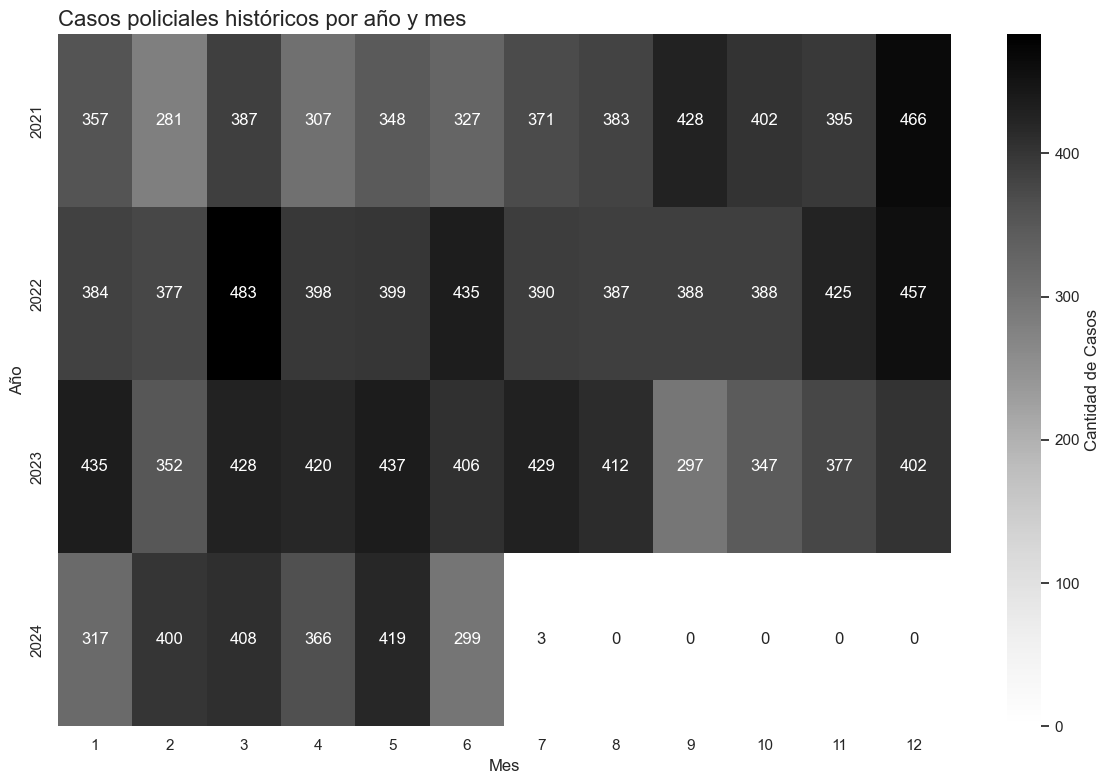

In [225]:
# ¿Cuando ocurrieron más sucesos?

#Casos por mes y año
mapa_de_casos = df_limpio.groupby([df_limpio['Event Date/Time'].dt.year, df_limpio['Event Date/Time'].dt.month]).size().unstack(fill_value=0)

# Graficos
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_de_casos, cmap='Greys', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Casos'})
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Casos policiales históricos por año y mes', fontsize=16, loc='left')
plt.tight_layout()
plt.show()

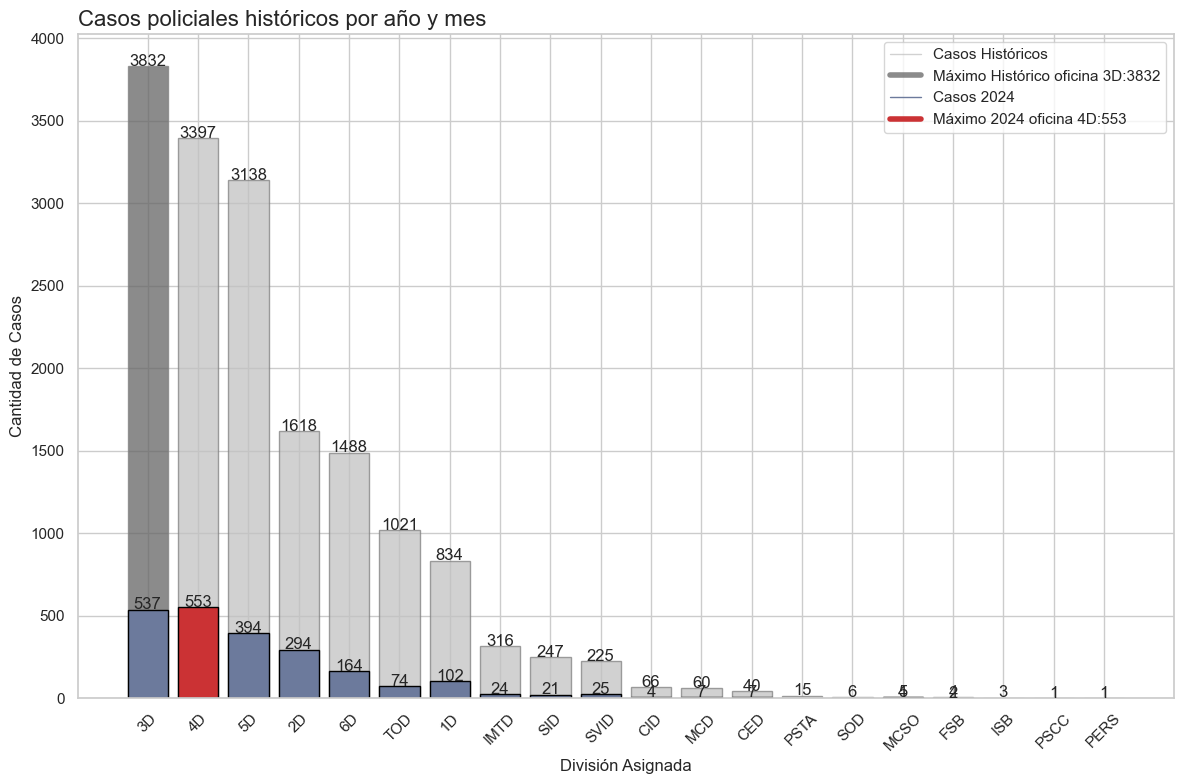

In [226]:
#Casos por oficina y casos por oficina en 2024
casos_por_oficina = df_limpio['Assigned Division'].value_counts()
casos_por_oficina_2024 = df_limpio_2024['Assigned Division'].value_counts()

# Identifico las oficinas con más casos
oficina_max_casos = casos_por_oficina.idxmax()
max_casos = casos_por_oficina.max()
oficina_max_casos_2024 = casos_por_oficina_2024.idxmax()
max_casos_2024 = casos_por_oficina_2024.max()

# Graficos
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(Casos_por_oficina.index, Casos_por_oficina.values, color='#c2c2c2', edgecolor='grey', label='Casos Históricos', alpha=0.75)
Grafico_barra_2024 = ax.bar(casos_por_oficina_2024.index, casos_por_oficina_2024.values, color='#6c7a9c', edgecolor='black', label='Casos 2024')

# Etiquetas y destaco en visualización oficinas con mas casos para la historia y 2024
for barra, oficina in zip(Grafico_barra, casos_por_oficina.index):
    yval = barra.get_height()
    if oficina == oficina_max_casos:
        barra.set_color('#646464')
        barra.set_edgecolor('grey')
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, f'{yval}', ha='center')
    
for barra, oficina in zip(Grafico_barra_2024, casos_por_oficina_2024.index):
    yval = barra.get_height()
    if oficina == oficina_max_casos_2024:
        barra.set_color('#cb3234')
        barra.set_edgecolor('black')  
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, f'{yval}', ha='center')

# Configurar el gráfico
ax.set_xlabel('División Asignada', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por División', fontsize=12, loc='left')
handles = [
    plt.Line2D([0], [0], color='#c2c2c2', lw=1, alpha=0.75),  # Casos Históricos
    plt.Line2D([0], [0], color='#646464', lw=4, alpha=0.75),  # Máximo Histórico
    plt.Line2D([0], [0], color='#6c7a9c', lw=1),  # Casos 2024
    plt.Line2D([0], [0], color='#cb3234', lw=4)   # Máximo 2024
]

labels = [
    'Casos Históricos',
    f'Máximo Histórico oficina {oficina_max_casos}:{max_casos}',
    'Casos 2024',
    f'Máximo 2024 oficina {oficina_max_casos_2024}:{max_casos_2024}'
]

ax.legend(handles=handles, labels=labels, loc='upper right')
plt.xticks(rotation=45)
plt.title('Casos por división', fontsize=16, loc='left')
plt.tight_layout()
plt.show()

`Conclusiones descriptivas`


In [ ]:
# ¿Cual ha sido la evolución historica en el tiempo?

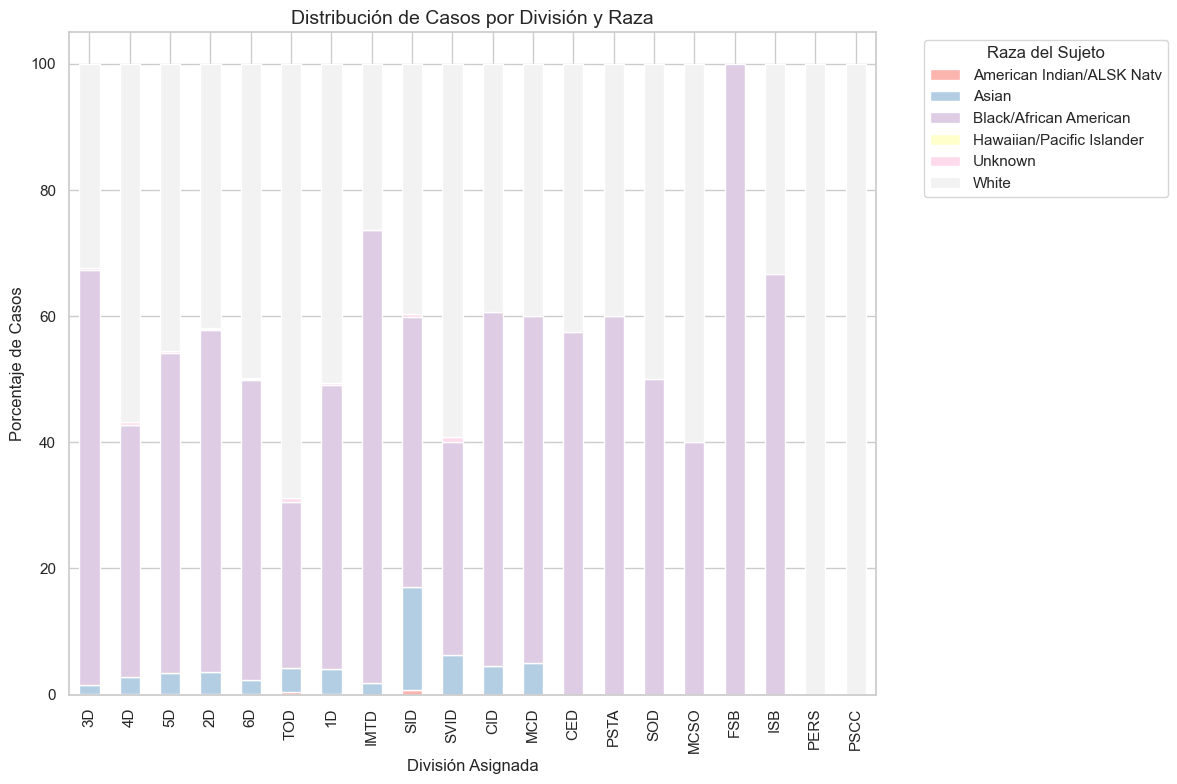

In [155]:
# 
grouped = df_limpio.groupby(['Assigned Division', "Subject's race"]).size().unstack(fill_value=0)
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Pastel1')
plt.xlabel('División Asignada', fontsize=12)
plt.ylabel('Porcentaje de Casos', fontsize=12)
plt.title('Distribución de Casos por División y Raza', fontsize=14)
plt.legend(title="Raza del Sujeto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

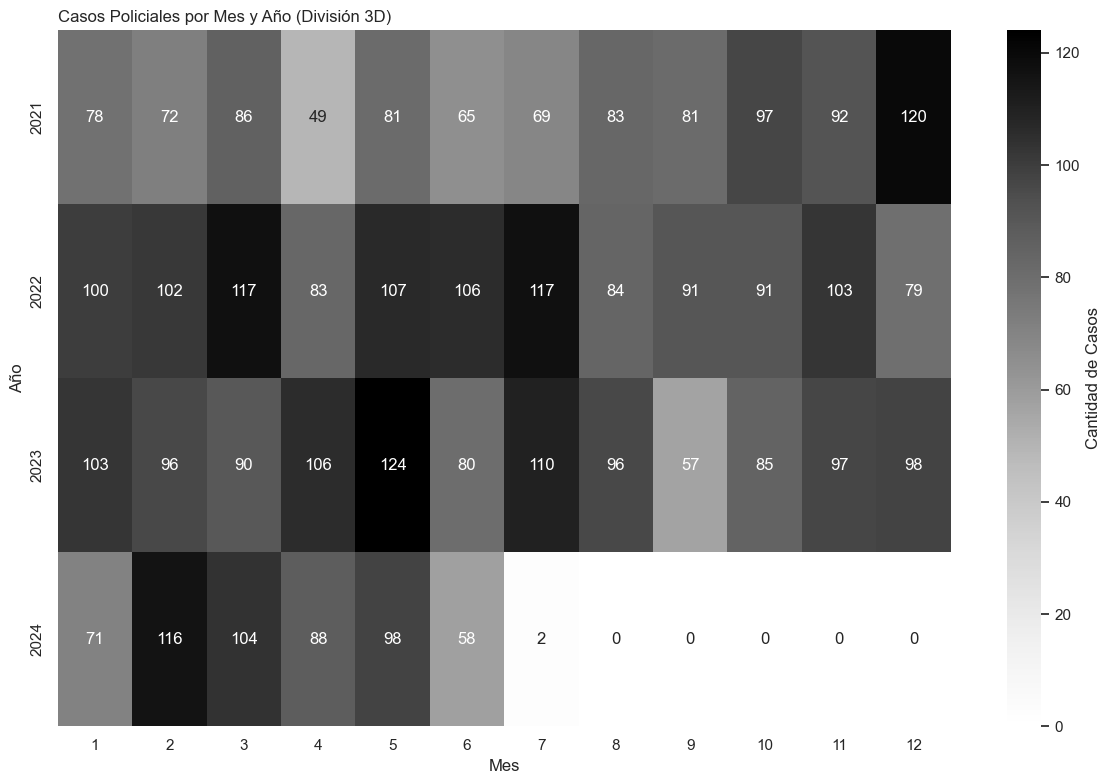

In [156]:
# ¿Cuando ocurren mas sucesos en la oficina con más casos?
df_3D = df_limpio[df_limpio['Assigned Division'] == '3D']
mapa_de_casos = df_3D.groupby([df_3D['Event Date/Time'].dt.year, df_3D['Event Date/Time'].dt.month]).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(mapa_de_casos, cmap='Greys', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Casos'})
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Casos Policiales por Mes y Año (División 3D)', fontsize=12, loc='left')
plt.tight_layout()
plt.show()

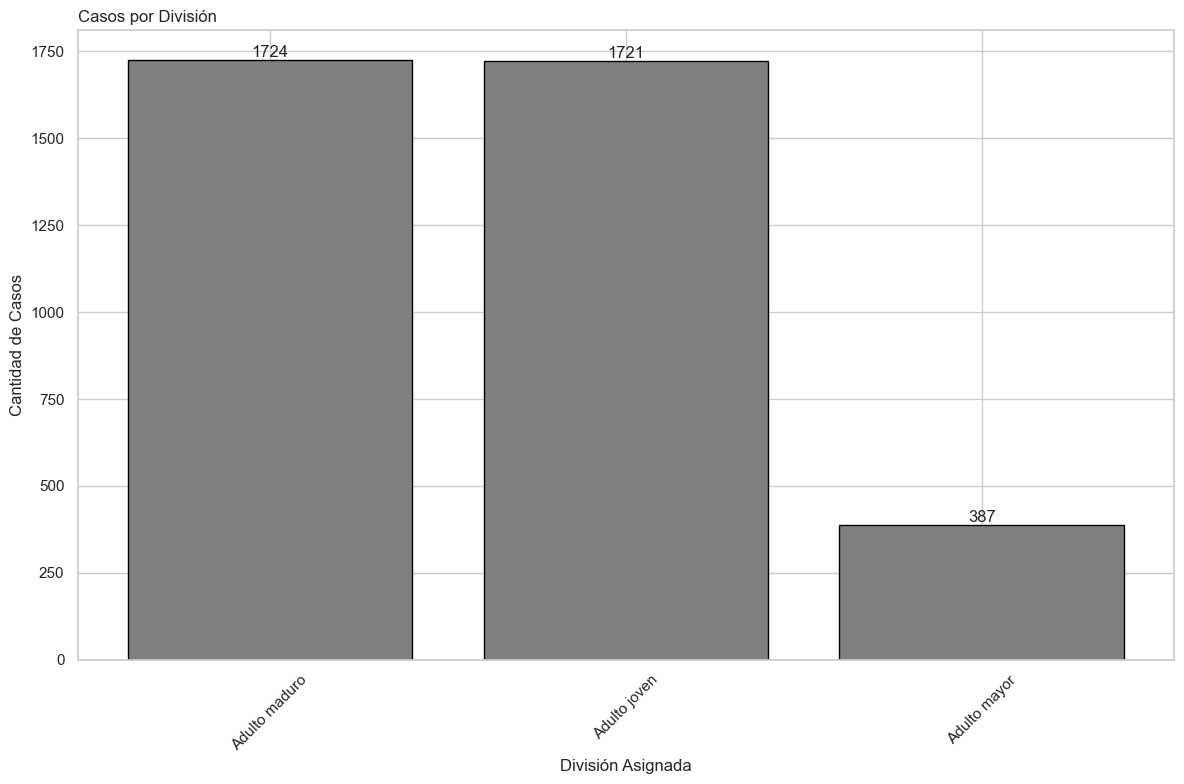

In [38]:
# ¿Cuales son las oficinas con más cantidad de casos?
division_counts = df_3D['AgeGroup'].value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
Grafico_barra = ax.bar(division_counts.index, division_counts.values, color='grey', edgecolor='black')
for barra in Grafico_barra:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')
ax.set_xlabel('División Asignada', fontsize=12)
ax.set_ylabel('Cantidad de Casos', fontsize=12)
ax.set_title('Casos por División', fontsize=12, loc = "left" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Administrador\AppData\Local\Temp\ipykernel_3824\813632991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Subject's race", y="Subject's age", data=df_3D_Adultomaduro, palette='Set2')


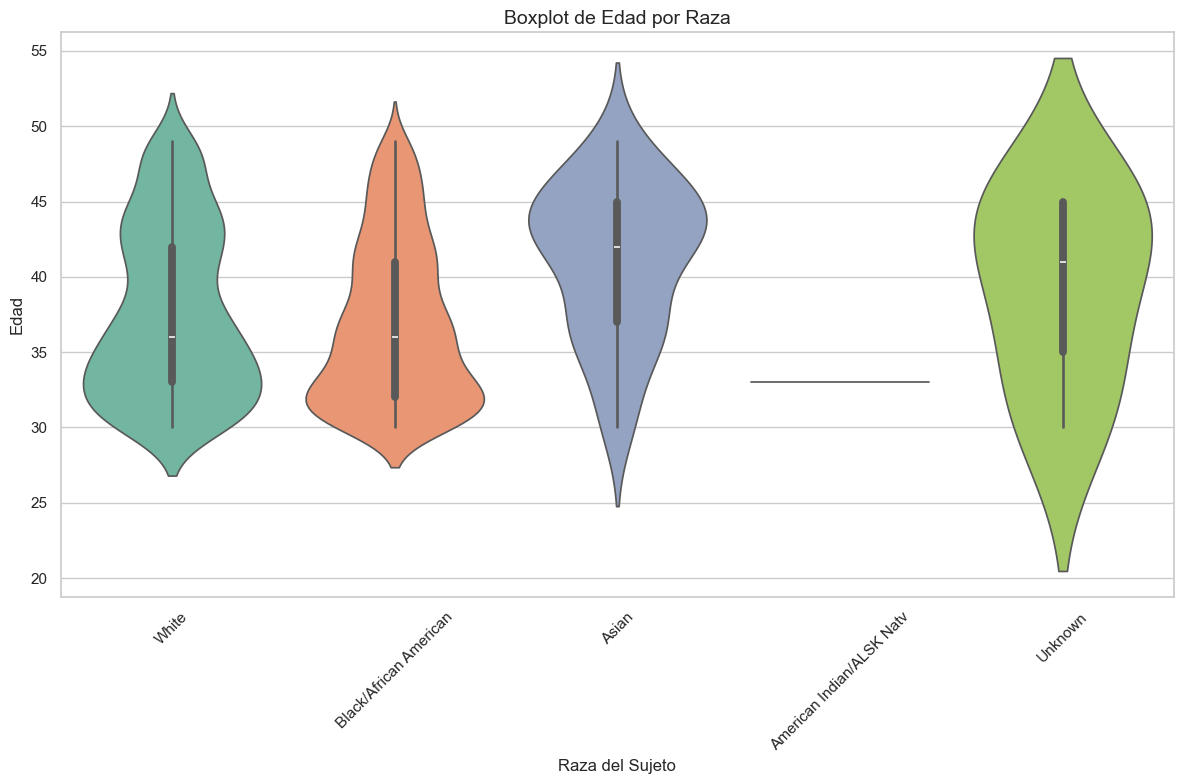

In [39]:
df_3D_Adultomaduro = df_3D[df_3D['AgeGroup'] == 'Adulto maduro']
plt.figure(figsize=(12, 8))
sns.violinplot(x="Subject's race", y="Subject's age", data=df_3D_Adultomaduro, palette='Set2')
plt.xlabel('Raza del Sujeto', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.title('Boxplot de Edad por Raza', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()